##  <u>Part One - PROJECT BASED</u>

• <b>DOMAIN:</b> Healthcare<br>

• <b>CONTEXT:</b>    Medical  research  university  X  is  undergoing  a  deep  research  on  patients  with  certain  conditions. University  has  an  internal  AI  team.  Due  to  confidentiality  the  patient’s  details  and  the  conditions  are  masked  by the  client  by  providing  different  datasets  to  the  AI  team  for  developing  a  AIML  model  which  can  predict  the condition of the patient depending on the received test results.<br>

• <b>DATA  DESCRIPTION:</b> The  data  consists  of  biomechanics  features  of  the  patients  according  to  their  current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.<br>

1.P_incidence<br>
2.P_tilt<br>
3.L_angle<br> 
4.S_slope<br>
5.P_radius <br>
6.S_degree<br>
7.Class<br>

• <b>PROJECT OBJECTIVE:</b> Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.<br><br>
Steps and tasks: <br>
1. Import and warehouse data:<br><br>
    • Import all the given datasets and explore shape and size of each.<br>
    • Merge all datasets onto one and explore final shape and size.<br><br>
2. Data cleansing:<br><br>
    • Explore and if required correct the datatypes of each attribute<br>
    • Explore for null values in the attributes and if required drop or impute values.<br><br>
3. Data analysis & visualisation:<br><br>
    • Perform detailed statistical analysis on the data.<br>
    • Perform  a  detailed  univariate,  bivariate  and  multivariate  analysis  with  appropriate  detailed  comments  after        each analysis.<br><br>
4. Data pre-processing:<br><br>
    • Segregate predictors vs target attributes<br>
    • Perform normalisation or scaling if required.<br>
    • Check for target balancing. Add your comments.<br>
    • Perform train-test split.<br><br>
5. Model training, testing and tuning:<br><br>
    • Design and train a KNN classifier.<br>
    • Display the classification accuracies for train and test data.<br>
    • Display and explain the classification report in detail.<br>
    • Automate the task of finding best values of K for KNN.<br>
    • Apply  all  the  possible  tuning  techniques  to  train  the  best  model  for  the  given  data.  Select  the final          best  trained model with your comments for selecting this model. <br><br>
6. Conclusion and improvisation:<br><br>
    • Write your conclusion on the results.<br>
    • Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data        points collected by the research team to perform a  better data analysis in future.

### <u>Solution</u>

### 1.Import and warehouse data:

In [1]:
#Import Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the datasets
df_normal = pd.read_csv('Part1 - Normal.csv')
df_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [3]:
df_typeh = pd.read_csv('Part1 - Type_H.csv')
df_typeh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [4]:
df_types = pd.read_csv('Part1 - Type_S.csv')
df_types.head()
#the three  data sets are imported

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [5]:
print(df_normal.shape)
df_normal.size


(100, 7)


700

In [6]:
print(df_typeh.shape)
df_typeh.size


(60, 7)


420

In [7]:
print(df_types.shape)
df_types.size

(150, 7)


1050

We can observe that there is only fewer data of class 'Type_H' as compared to other class types.

**Since each dataset calims to be divided based on their 'Class' types, we would like to confirm that each dataset consist of a particular dataset only.**


In [8]:
print('Dataset Normal\n',df_normal.Class.value_counts())
print('\nDataset Type-H\n',df_typeh.Class.value_counts())
print('\nDataset Type-S\n',df_types.Class.value_counts())


Dataset Normal
 Normal    73
Nrmal     27
Name: Class, dtype: int64

Dataset Type-H
 Type_H    37
type_h    23
Name: Class, dtype: int64

Dataset Type-S
 Type_S    133
tp_s       17
Name: Class, dtype: int64


<br> From above result we can see each dataset contain only a particular Class type only. But they are entered in their short forms,some are represented in different cases. 
So we need to group them to a single type. <br>

In [9]:
df_normal.Class.replace(to_replace='Nrmal',value='Normal',inplace=True)
df_normal.Class.value_counts()


Normal    100
Name: Class, dtype: int64

In [10]:
df_typeh.Class.replace(to_replace='type_h',value='Type_H',inplace=True)
df_typeh.Class.value_counts()

Type_H    60
Name: Class, dtype: int64

In [11]:
df_types.Class.replace(to_replace='tp_s',value='Type_S',inplace=True)
df_types.Class.value_counts()

Type_S    150
Name: Class, dtype: int64

In [12]:
#Checking for any duplicate rows
print(df_normal.duplicated().sum())
print(df_typeh.duplicated().sum())
print(df_types.duplicated().sum())

0
0
0


<br> Now we have to merge three datasets onto one<br>

In [13]:
df_health = df_types.merge(df_normal.merge(df_typeh,how='outer'),how='outer')
df_health.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
160,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,Normal
140,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,Type_S
307,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
127,60.419932,5.265665,59.814236,55.154267,109.033075,30.265785,Type_S
167,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,Normal
180,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538,Normal
52,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671,Type_S
150,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S


In [14]:
df_health.shape
#We have merged three datasets onto one.

(310, 7)

In [15]:
df_health.duplicated().sum()
#Checking finally for any duplicates

0

### 2.Data cleansing:

In [16]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [17]:
df_health['Class'] = df_health.Class.astype('category')
df_health.dtypes
#Converting Class type from object to category and validating the change

P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object

In [18]:
#Checking for any null values
df_health.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

<br>**From above code we can say there are no missing values, and we can say there are no Non-Standard Missing values because the data were automatically converted to their respective datatypes withou any explicit conversion.
We can confirm this by further analysis.**

### 3.Data analysis & visualisation:

In [19]:
df_health.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

<br> There are 150 Type_S Class values which is the highest.

In [20]:
df_health.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


**From above we can see the different quartiles of each independent variables.<br>
P_incidence : 25% of values are less than 46, where half or 50% of values are less than 58. The values might be equaly distributed, need to confirm through visualisation.<br><br>
P_tilt : Here we can see the minimum value is a negative number. The mean and 50% are almost equal.<br><br>
L_angle : The mean and 50% are almost equal. 75% values are less than 63 and the maximum value is 125, so there might be more values to the right and there might be skewness but need to confirm.<br><br>
S_slope : There is only a slight difference between mean and 50%. 75% values are less than 52 but the maximum value is 121 so there might be some outliers.<br><br>
P_radius : Values might be equally distributed since there is no uncertainity in the quartiles.<br><br>
S_Degree : Here the minimum value is negative. The mean is greater than 50% by a great amount. There is big difference between each quartiles and the maximum values is 418, so there is a higher chance to have outliers and skewness.<br>**

<br>Now we need to validate our findings through visualisation<br>

**Univariate Analysis**

**Distribution plot of all numerical variables**

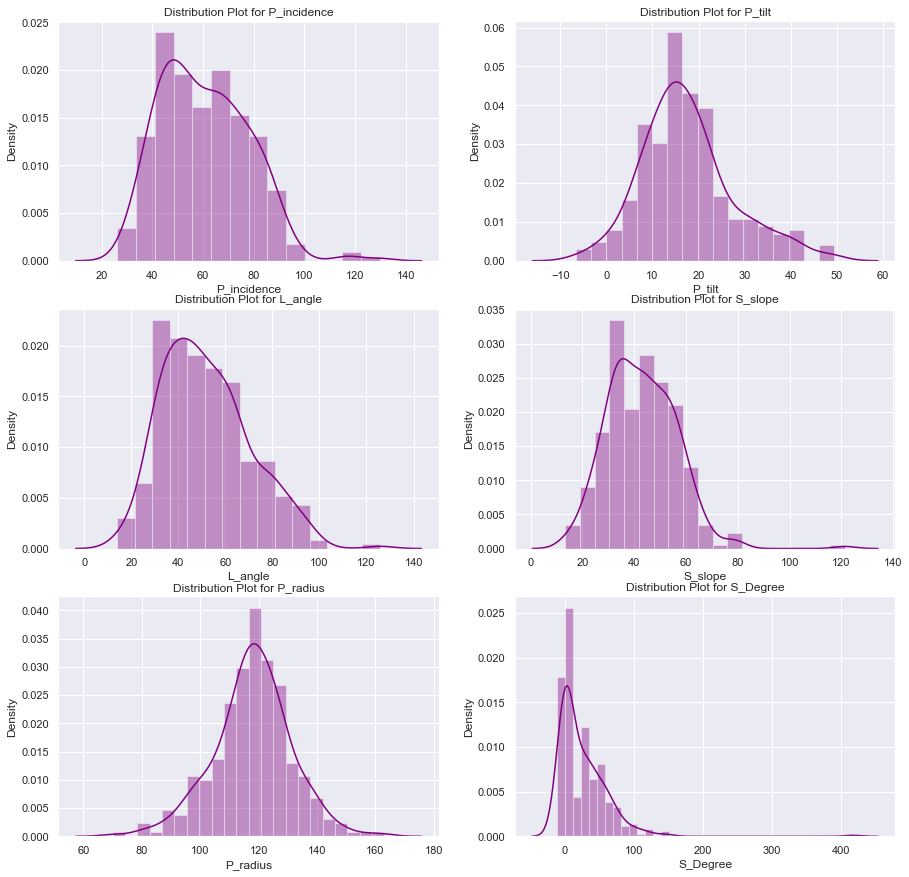

In [21]:
fig1,ax1 = plt.subplots(3,2)
fig1.set_figheight(15)
fig1.set_figwidth(15)
for i,col in  enumerate(df_health.iloc[:,:6].columns):
    sns.distplot(df_health[col],color='Purple',ax=ax1[i//2,i%2])
    ax1[i//2,i%2].set_title('Distribution Plot for %s'%col)


**Analysis and  checking for outliers**

In [22]:
#Function to find the outliers. It takes the colum as argument and returns the outlier values.
def check_Outlier(inp1):
    Q_1 = inp1.quantile(0.25)
    Q_3 = inp1.quantile(0.75)
    IQR = Q_3-Q_1
    print('\nIQR = ',IQR)
    upper_fence = Q_3+(IQR*1.5)
    lower_fence = Q_1-(IQR*1.5)
    print('Upper Fence = ',upper_fence,'\nLower Fence = ',lower_fence)
    outliers_out = inp1[(inp1>upper_fence) | (inp1<lower_fence)]
    return outliers_out


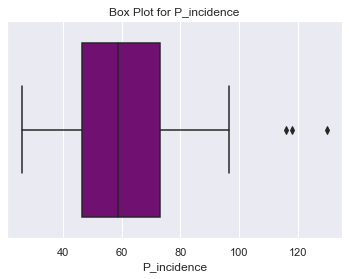

In [23]:
#Boxplot of P_incidence
sns.boxplot(x='P_incidence',data=df_health,color='Purple')
plt.title('Box Plot for P_incidence')
plt.show()

In [24]:
#From above image we can see there are three outliers present but we need to confirm


print('\n The number of Outliers present = ',len(check_Outlier(df_health.P_incidence)))



IQR =  26.447401299999996
Upper Fence =  112.54879745999999 
Lower Fence =  6.759192260000006

 The number of Outliers present =  3


**For P_incidence we can see three outliers exist which confirms our finding. The Distribution graph for P_incidence show the data is distributed somewhat equally.**

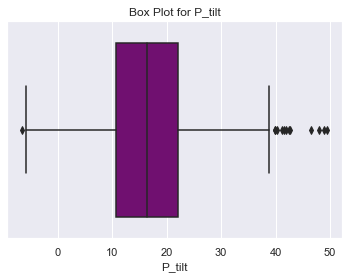

In [25]:
#Boxplot of P_tilt
sns.boxplot(x='P_tilt',data=df_health,color='Purple')
plt.title('Box Plot for P_tilt')
plt.show()

In [26]:
#From above image we can see there are  outliers present but we need to confirm and count the number.

print('\n The number of Outliers present = ',len(check_Outlier(df_health.P_tilt)))



IQR =  11.453325680000003
Upper Fence =  39.300383260000004 
Lower Fence =  -6.512919460000003

 The number of Outliers present =  13


**For P_tilt we can see 13 outliers exist which confirms our finding.The data is normally distributed.There is lower outliers also**

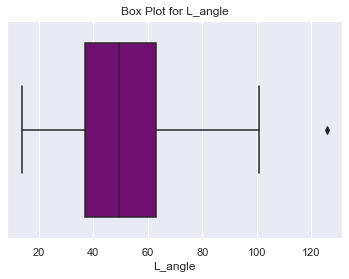

In [27]:
#Boxplot of L_angle
sns.boxplot(x='L_angle',data=df_health,color='Purple')
plt.title('Box Plot for L_angle')
plt.show()

In [28]:
#From above image we can see there is only one outlier present but we need to confirm and count the number.

print('\n The number of Outliers present = ',len(check_Outlier(df_health.L_angle)))



IQR =  25.99999999
Upper Fence =  101.99999997500001 
Lower Fence =  -1.9999999850000023

 The number of Outliers present =  1


**It is slighlty normaly distributed. Contains only one outlier**

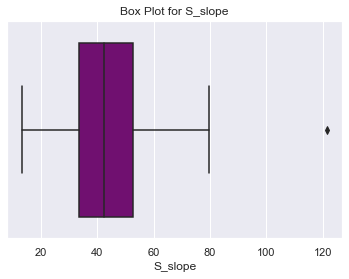

In [29]:
#Boxplot of S_slope
sns.boxplot(x='S_slope',data=df_health,color='Purple')
plt.title('Box Plot for S_slope')
plt.show()

In [30]:
#From above image we can see there is only one outlier present but we need to confirm and count the number.


print('\n The number of Outliers present = ',len(check_Outlier(df_health.S_slope)))



IQR =  19.3487663425
Upper Fence =  81.71903786875001 
Lower Fence =  4.323972498750003

 The number of Outliers present =  1


**It contain one outlier, it is not perfectly distributed**

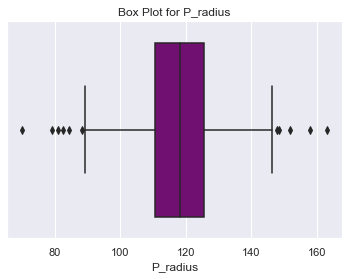

In [31]:
#Boxplot of P_radius
sns.boxplot(x='P_radius',data=df_health,color='Purple')
plt.title('Box Plot for P_radius')
plt.show()

In [32]:
#From above image we can see there are many outlier present but we need to confirm and count the number.


print('\n The number of Outliers present = ',len(check_Outlier(df_health.P_radius)))



IQR =  14.75847812500001
Upper Fence =  147.60539161250003 
Lower Fence =  88.57147911249999

 The number of Outliers present =  11


**For P_radius the data is normally distributed, we can see 11 outliers which include negative outliers also**

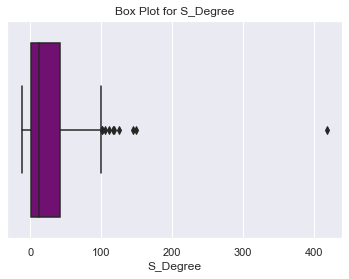

In [33]:
#Boxplot of S_Degree
sns.boxplot(x='S_Degree',data=df_health,color='Purple')
plt.title('Box Plot for S_Degree')
plt.show()

In [34]:
#From above image we can see there are many outlier present but we need to confirm and count the number.

print('\n The number of Outliers present = ',len(check_Outlier(df_health.S_Degree)))



IQR =  39.68362528875
Upper Fence =  100.812789895625 
Lower Fence =  -57.921711259375

 The number of Outliers present =  10


**Right skewness is visible due to outliers**

**Univariate Analysis of Categorical Variable**

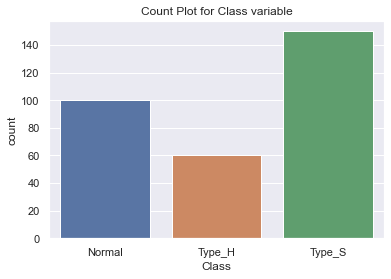

In [35]:
sns.countplot(x='Class',data=df_health)
plt.title('Count Plot for Class variable')
plt.show()

**Type_H class have lower number of values and Type_S have the highest.**

<br>**Bi Variate Analysis**

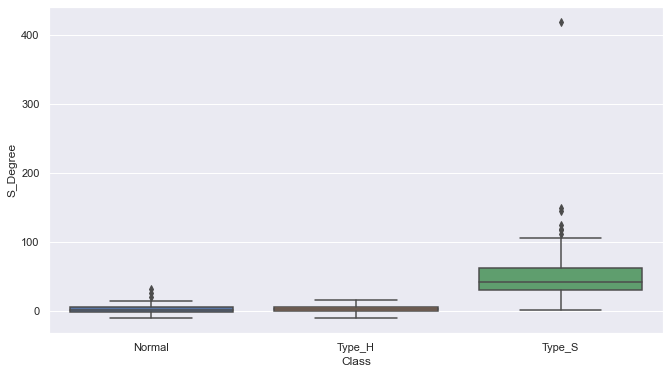

In [36]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='S_Degree',data=df_health)
plt.show()

**Type_H has no outliers for S_Degree. Type_S have higher values than total range of other classes**<br><br><br>

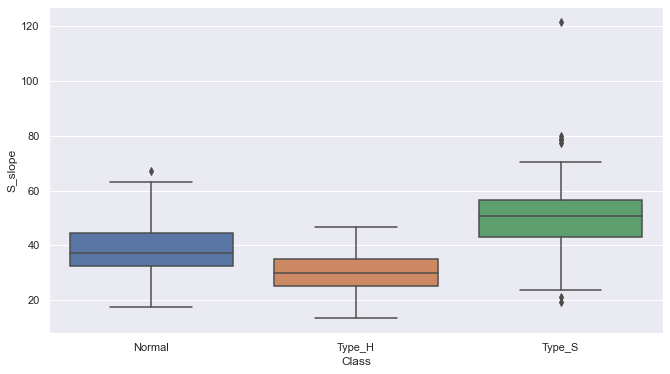

In [37]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='S_slope',data=df_health)
plt.show()

**Class Type_H have no outliers as compared to other class for S_slope. Type_S have higher values than rest**<br><br><br>

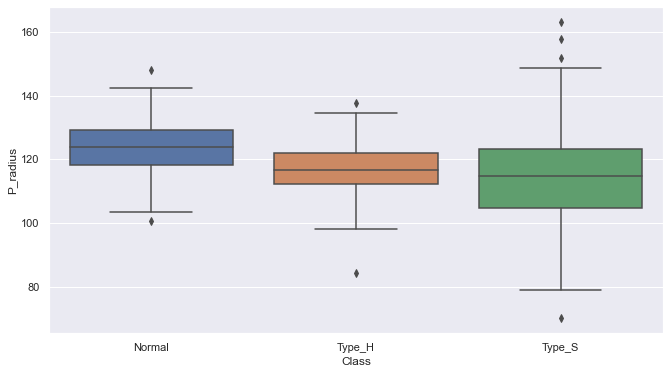

In [38]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='P_radius',data=df_health)
plt.show()

**Three classes have both higher and lower end outliers. Normal class have higher values for P_radius but Type_S has large whiskers.**<br><br><br>

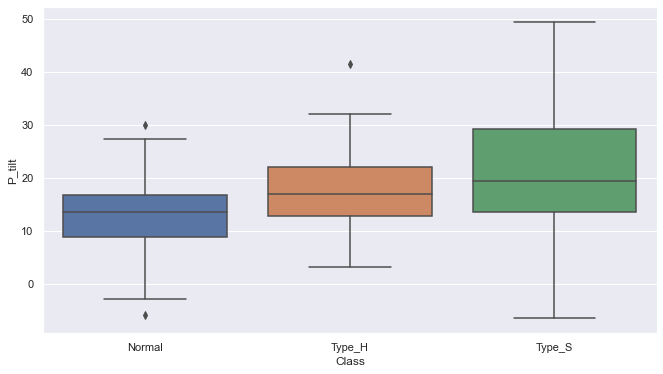

In [39]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='P_tilt',data=df_health)
plt.show()

**Type_S Class have higher values for P_tilt. Normal Class have the lower values.The total range including the whiskers of Type_S covers both Type_H and Normal class range of values.**<br><br><br>

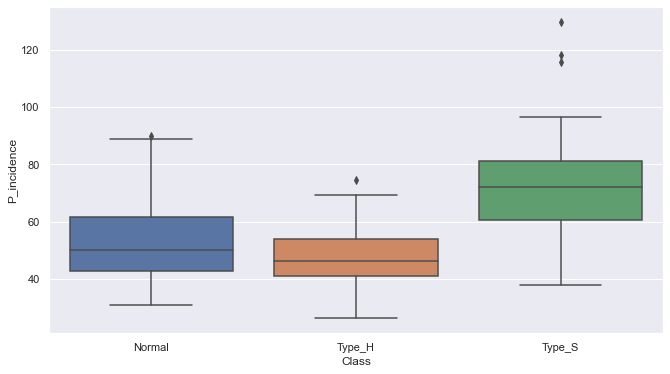

In [40]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='P_incidence',data=df_health)
plt.show()

***Type_S class have higher value for P_incidence and Type_H have the least.The mean of Type_S is almost near to the maximum value of Type_H.***<br><br><br>

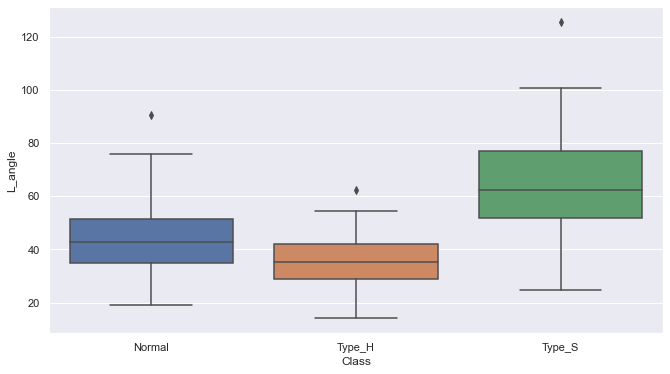

In [41]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Class',y='L_angle',data=df_health)
plt.show()

***Each Class contain one outlier for L_angle. The mean of Type_H class is almost equal to the lower quartile of Normal class.***<br><br><br>

<br>**Multivariate Analysis**

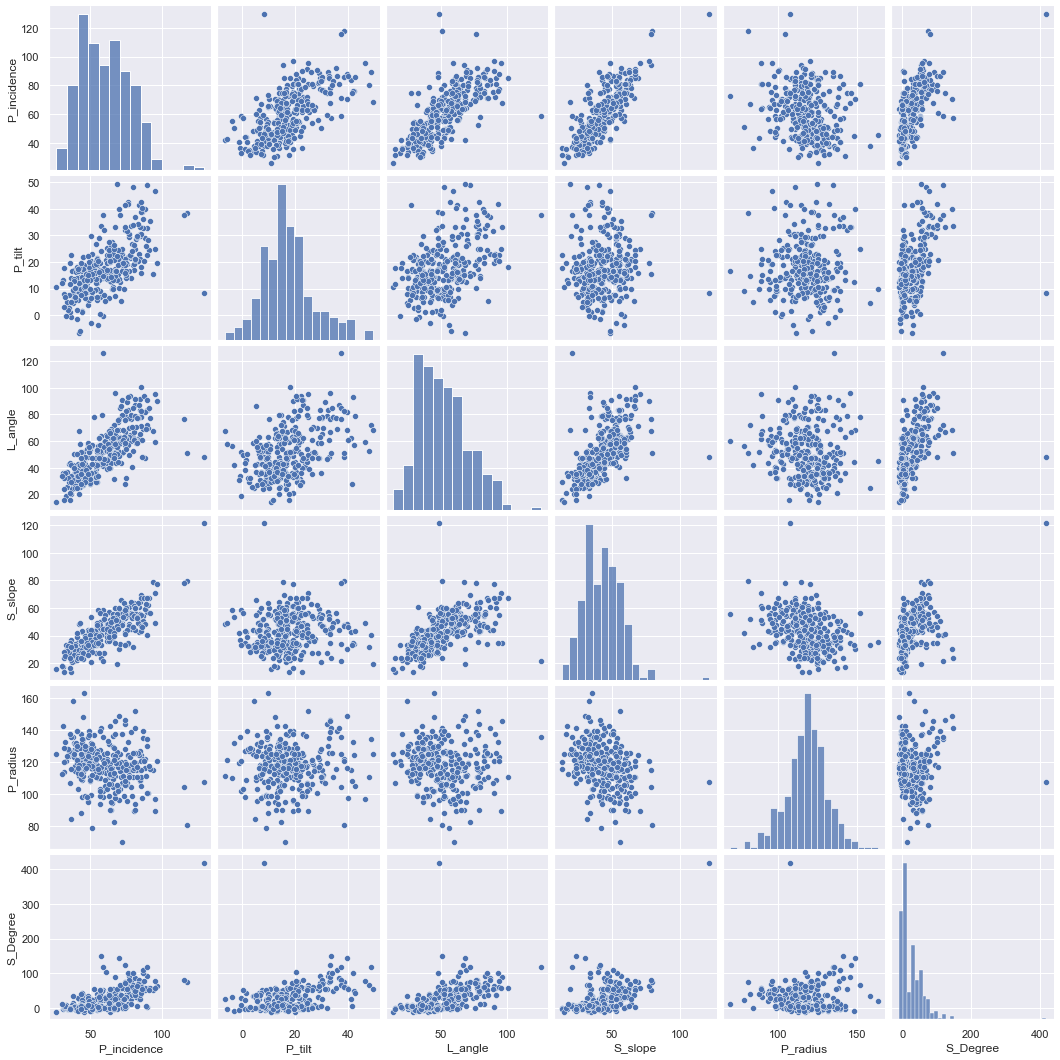

In [42]:
sns.pairplot(df_health);

From the above pairplot we can gather evidence for any relationship between independent variables.<br>
There are some good positive relationship between P_incidence - S_slope, P_incidence - L_angle, L_angle - S_Degree.<br>
For S_Degree there is no positive Relationship with any other variables.<br> For P_radius eventhough there is positive relation but it is not strong enoug.

<br>**We can visualise these finding more.**

In [43]:
corr1 = df_health.corr()
corr1
#Display the correaltion values between variables. What we gathered from pairplot we can see the actual values here.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:>

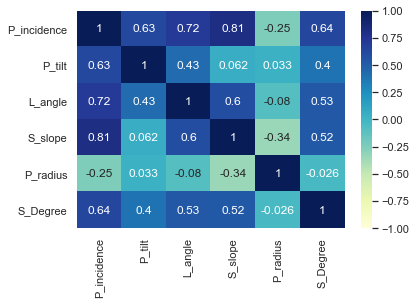

In [44]:
sns.heatmap(corr1,annot=True,cmap='YlGnBu',vmin=-1,vmax=1)
#Heat map of correlation

**Here we can both visulaise and understand each correlation value.**

### 4. Data pre-processing:

Before building a model for ML we have to pre-process the data. From multiple analysis we have observed number of outliers present in each variable.
These outliers can hinder our prediction. We can deal with these outliers either by removing them or replacing them with respective mean,median etc.
But removing outliers sometimes can lead to loosing valuable information, and considering this a small dataset it is better to impute the outliers.

<br><br>**Printing outliers in each independent variables and imputing them with their respective mean values.**

In [45]:
col = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

for x in col:
    print('\n',x,'\n')
    out_r = check_Outlier(df_health[x])
    
    print('The number of Outliers present in %s before imputing = %d'%(x,len(out_r)))
    Q1,Q3 = df_health[x].quantile(0.25),df_health[x].quantile(0.75)
    I_QR = Q3-Q1
    T = I_QR*1.5 
    lvalue,uvalue = Q1-T,Q3+T
    
    out_df = df_health.loc[(df_health[x] >=lvalue) & (df_health[x] <= uvalue)]
    health_mean = int(out_df[x].mean())
    print('Mean of %s = %f'%(x,health_mean))
    df_health[x] = np.where(df_health[x]>uvalue,health_mean,df_health[x])
    df_health[x] = np.where(df_health[x]<lvalue,health_mean,df_health[x])
    out_r = df_health.loc[(df_health[x] <lvalue) & (df_health[x] > uvalue)]
    print('The number of Outliers present in %s after imputing = %d'%(x,len(out_r)))
   


 P_incidence 


IQR =  26.447401299999996
Upper Fence =  112.54879745999999 
Lower Fence =  6.759192260000006
The number of Outliers present in P_incidence before imputing = 3
Mean of P_incidence = 59.000000
The number of Outliers present in P_incidence after imputing = 0

 P_tilt 


IQR =  11.453325680000003
Upper Fence =  39.300383260000004 
Lower Fence =  -6.512919460000003
The number of Outliers present in P_tilt before imputing = 13
Mean of P_tilt = 16.000000
The number of Outliers present in P_tilt after imputing = 0

 L_angle 


IQR =  25.99999999
Upper Fence =  101.99999997500001 
Lower Fence =  -1.9999999850000023
The number of Outliers present in L_angle before imputing = 1
Mean of L_angle = 51.000000
The number of Outliers present in L_angle after imputing = 0

 S_slope 


IQR =  19.3487663425
Upper Fence =  81.71903786875001 
Lower Fence =  4.323972498750003
The number of Outliers present in S_slope before imputing = 1
Mean of S_slope = 42.000000
The number of Outliers pre

**Outliers have been removed**

<br><br>Before segregating our predictors and target attribute we can have to perform some tasks..From the dataset we can observe categorical data. This data should be converted to numbers because the ML model understand it.
We can handle categorical data using One-hot encoding as well as Label Encoding. Here we are using Label Encoding to deal with our categorical data.

In [46]:
#Label Encoding
L_encoding = LabelEncoder()
df_health['Class'] = L_encoding.fit_transform(df_health['Class'])
df_health.Class.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

The category Normal of 100 values converted to label 0, Type_H of 60 values converted to label 1 and Type_S of 150 values converted to label 2. These sorting is done based on the alphabetical ordering.
<br>As we converted category to numeric the datatype of the attribute also got changed, so we need to convert it back to category datatype

In [47]:
print(df_health.Class.dtype)
df_health['Class'] = df_health.Class.astype('category')
print(df_health.Class.dtype)

int32
category


<AxesSubplot:xlabel='Class', ylabel='count'>

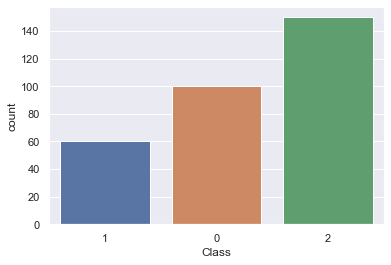

In [48]:
#Since class is our target variable, we need to check for  target imbalancing. Imbalancing refers where the number of observations per class is not 
#equally distributed which may hinder our classification
#We can check for this distribution using countplot
sns.countplot('Class',data=df_health,order=[1,0,2])

We can clearly visualise that there is imbalance in the target variable. Category 2 have higher number of data


**Predictors and Target**

In [49]:
#we need to separate our data into dependent variable and independent variables for our model building
X = df_health.drop(columns='Class') #Dependent Variables
y = df_health.Class #Target Variable
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705427,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


A dataset can contain different variety of data, we may not know on what basis these data are recorded. For each attribute their range might be different, these extreme difference in range could slow down our ML model. Here we are using KNN and KNN uses distance between points it is highly recommended to scale the data so that it properly contribute to the result.

In [50]:
#Here we are using zscore to scale our independent variables

X_Scaled = X.apply(zscore)
X_Scaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.314361e-16,4.130209e-16,-4.978097e-17,-9.168293e-17,-9.716242e-16,-4.075593e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-2.094203e+00,-2.669021e+00,-2.089008e+00,-2.321190e+00,-2.539211e+00,-1.320025e+00
25%,-8.355166e-01,-6.963909e-01,-8.142027e-01,-7.399847e-01,-5.974493e-01,-8.173729e-01
50%,-7.463765e-02,-6.537350e-02,-1.179154e-01,-2.758162e-02,-5.408187e-03,-4.138745e-01
75%,7.707333e-01,5.330588e-01,6.249289e-01,7.737986e-01,6.300660e-01,6.332235e-01
max,2.281479e+00,2.646095e+00,2.718904e+00,2.927936e+00,2.508397e+00,3.100356e+00


From above we can see all the independent variable are scaled to equal ranges. We can also observe mean and standarad deviation are close to zero.

<br>Now since the data is pre processed we can split the data to tain and test.

**Train - Test Split**

In [51]:
X_train, X_test, y_train,y_test = train_test_split(X_Scaled,y,test_size=0.30,random_state=10)
#Data is split into 70:30 ratio

### 5.Model training, testing and tuning:

**KNN classifier**

In [52]:
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#For now we are building knn model with 5 neighbors
KNN_model.fit(X_train,y_train)
predicted_labels = KNN_model.predict(X_test)

In [53]:
predicted_labels

array([2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 0], dtype=int64)

**Classification Accuracy for train and test data**

In [54]:
print('Accuracy of Training data: ',KNN_model.score(X_train,y_train))
print('Accuracy of Test data: ',KNN_model.score(X_test,y_test))

Accuracy of Training data:  0.8387096774193549
Accuracy of Test data:  0.7849462365591398


From Accuracy we can observe Performance is less in test data with a score of 0.78. We can say that this score is due to noise in the data or overfitting.

**We can visualise using Confusion matrix**

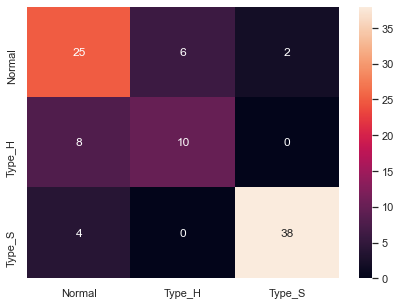

In [55]:
CM = confusion_matrix(y_test,predicted_labels,labels=[0,1,2])
df_cm = pd.DataFrame(CM, index = [i for i in ['Normal','Type_H','Type_S']],columns=[i for i in ['Normal','Type_H','Type_S']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

**The above confusion matrix shows that the Normal class is mostly incorrectly labeled whereas Type_S are most correctly classified**

<br>**Classification Report:**

In [56]:
print("\t\tClassification Report:\n",classification_report(y_test,predicted_labels))

		Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.71        33
           1       0.62      0.56      0.59        18
           2       0.95      0.90      0.93        42

    accuracy                           0.78        93
   macro avg       0.75      0.74      0.74        93
weighted avg       0.79      0.78      0.79        93



Class 2 have higher precision value 0.93 which means what fraction are predicted correctly out of all predicted same class.<br>
Class 1 have lower recall value 0.53 which means out of all actual Normal class how much fraction were identified correctly.<br>
F1 score determine how precision and recall is balanced. Class 2 has maximum F1 score.

**Choosing the K-Value**

We tend to choose an odd number as K value for most of the time. But care should be given for choosing the right K since it is subjective<br>
Small value of K overfit and large value of K underfits

In [57]:
train_s =[]
test_s=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
    KNN.fit(X_train,y_train)
    train_s.append(KNN.score(X_train, y_train))
    test_s.append(KNN.score(X_test,y_test))

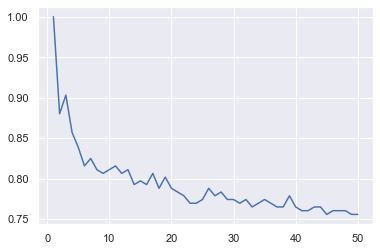

In [58]:
#Now the score value for each K value is stored. It is difficult to observe these huge numbers so we visualise them using graph.
plt.plot(range(1,51),train_s)
plt.show()
#ploting training score

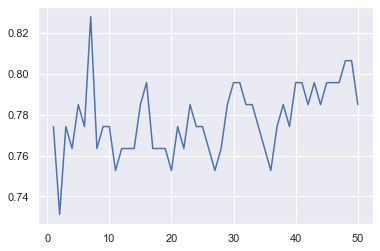

In [59]:
#plotting test score
plt.plot(range(1,51),test_s)
plt.show()

It is evident from graph that training accuracy is decreasing as K value increase.<br>
For test accuracy the value is highest when K value is less than 10

In [60]:
#Now we take all possible K values in the range which could give best test accuracy
k=[1,3,5,7,9]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    KNN.fit(X_train,y_train)
    predicted_labels = KNN.predict(X_test)
    print('\nAccuarcy of Training data for K %d is = %f'%(i,KNN.score(X_train,y_train)))
    print('Accuarcy of Test data for K %d is = %f'%(i,KNN.score(X_test,y_test)))
    print("\n\t\tClassification Report:\n",classification_report(y_test,predicted_labels))


Accuarcy of Training data for K 1 is = 1.000000
Accuarcy of Test data for K 1 is = 0.774194

		Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        33
           1       0.57      0.72      0.63        18
           2       0.95      0.88      0.91        42

    accuracy                           0.77        93
   macro avg       0.74      0.76      0.75        93
weighted avg       0.79      0.77      0.78        93


Accuarcy of Training data for K 3 is = 0.903226
Accuarcy of Test data for K 3 is = 0.774194

		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        33
           1       0.53      0.50      0.51        18
           2       0.95      0.93      0.94        42

    accuracy                           0.77        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.77      0.77        93

For K=7 we have balanced train and test error. So out of the two we could choose K=7

### 6.Conclusion and improvisation:

**Target variable is influenced by most variables.<br>
Class of Type_S were mostly predicted correctly.<br>Variables has average correlations.<br>K=7 gave balanced accuracy for train and test data in KNN.<br>The size of the dataset is small which hinder our analysis,if we had good amount of data the model would be good.<br>Since it is medical dataset and highly important, more info about variables could have given an insight for choosing right variables.**

<br><br><br><br><br><br>

<br><br><br><br><br><br>

##  <u>Part Two - PROJECT BASED</u>

• <b>DOMAIN :</b> Banking and finance<br>
• <b>CONTEXT :</b> A bank  X  is  on  a  massive  digital  transformation  for  all  its  departments.  Bank  has  a  growing  customer  base  where majority of them are liability customers (depositors) vs borrowers (asset customers).   The bank is interested in expanding the borrowers  base  rapidly  to  bring  in  more  business  via  loan  interests.  A  campaign  that  the  bank  ran  in  last  quarter  showed  an average  single  digit  conversion  rate.  Digital  transformation  being  the  core  strength  of  the  business  strategy,  marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. <br>
• <b>DATA DESCRIPTION :</b> The data consists of the following attributes: <br><br>
1.<b>ID:</b> Customer ID<br>
2.<b>Age:</b> Customer’s approximate age.<br>
3.<b>CustomerSince:</b> Customer of the bank since. [unit is masked]<br>
4.<b>HighestSpend:</b> Customer’s highest spend so far in one transaction. [unit is masked]<br>
5.<b>ZipCode:</b> Customer’s zip code.<br>
6.<b>HiddenScore:</b> A score associated to the customer which is masked by the bank as an IP.<br>
7.<b>MonthlyAverageSpend:</b> Customer’s monthly average spend so far. [unit is masked]<br>
8.<b>Level:</b> A level associated to the customer which is masked by the bank as an IP.<br>
9.<b>Mortgage:</b> Customer’s mortgage. [unit is masked]<br>
10.<b>Security:</b> Customer’s security asset with the bank. [unit is masked]<br>
11.<b>FixedDepositAccount:</b> Customer’s fixed deposit account with the bank. [unit is masked]<br>
12.<b>InternetBanking:</b> if the customer uses internet banking.<br>
13.<b>CreditCard:</b> if the customer uses bank’s credit card.<br>
14.<b>LoanOnCard:</b> if the customer has a loan on credit card.<br><br>

• <b>PROJECT  OBJECTIVE :</b>  Build  an  AIML  model  to  perform  focused  marketing  by  predicting  the  potential  customers  who  will convert using the historical dataset.<br>
 Steps and tasks: <br><br>
 1.Import and warehouse data:<br><br>
 • Import all the given datasets and explore shape and size of each.<br>
 • Merge all datasets onto one and explore final shape and size.<br><br>
 2.Data cleansing:<br><br>
 • Explore and if required correct the datatypes of each attribute.<br>
 • Explore for null values in the attributes and if required drop or impute values.<br><br>
 3.Data analysis & visualisation:<br><br>
 • Perform detailed statistical analysis on the data.<br>
 • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.<br><br> 
 4.Data pre-processing:<br><br>
 • Segregate predictors vs target attributes.<br>
 • Check for target balancing and fix it if found imbalanced.<br>
 • Perform train-test split.<br><br>
 5.Model training, testing and tuning:<br><br>
 • Design and train a Logistic regression and Naive Bayes classifiers.<br>
 • Display the classification accuracies for train and test data.<br>
 • Display and explain the classification report in detail.<br>
 • Apply  all  the  possible  tuning  techniques  to  train  the  best  model  for  the  given  data.  Select  the final  best  trained  model  with your comments for selecting this model.<br><br>
 6.Conclusion and improvisation:<br><br>
 • Write your conclusion on the results.<br>
 • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.


### <u>Solution</u>

### 1. Import and warehouse data:

In [61]:
#importing dataset1
bank_num = pd.read_csv('Part2 - Data1.csv')
bank_num.sample(5) #Checking 5 samples of the data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
172,173,38,13,171,92717,2,7.8,1
823,824,35,9,45,90509,1,2.0,1
411,412,60,36,54,92182,4,2.3,3
282,283,34,9,71,91711,4,0.7,3
904,905,28,2,51,90503,4,1.8,2


In [62]:
#importing dataset2
bank_cat = pd.read_csv('Part2 -Data2.csv')
bank_cat.sample(5) #Checking 5 samples of the data

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
2744,2745,86,0,0,0,0,0.0
4533,4534,0,0,0,1,0,0.0
1634,1635,104,0,1,1,1,0.0
4363,4364,84,0,0,1,0,0.0
2428,2429,301,0,0,0,1,1.0


In [63]:
print(bank_num.shape)
bank_num.size

(5000, 8)


40000

In [64]:
print(bank_cat.shape)
bank_cat.size

(5000, 7)


35000

We have 5000 rows for both the dataset. First dataset have 8 columns while second dataset contain 7 columns only.

<br>We have to merge the two dataset with common column.

In [65]:
df_bank = bank_num.merge(bank_cat,left_on='ID',right_on='ID') #In both dataset ID column is common
df_bank.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4260,4261,57,31,52,94105,1,1.4,1,0,0,0,1,0,0.0
3015,3016,44,18,68,92673,4,2.9,1,0,1,0,0,1,0.0
3278,3279,31,6,132,94571,1,3.8,1,0,0,0,1,0,0.0
4308,4309,44,20,132,94115,3,2.6,1,308,0,0,0,0,1.0
4573,4574,46,20,73,95616,2,0.8,3,264,0,1,1,1,0.0


In [66]:
print(df_bank.shape)
df_bank.size

(5000, 14)


70000

Merged dataset has 14 columns

### 2.Data cleansing:

In [67]:
df_bank.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [68]:
cat_col = ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
for i in cat_col:
    df_bank[i] = df_bank[i].astype('category')
df_bank.dtypes    

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

Datatype has been converted

In [69]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.4 KB


In [70]:
df_bank.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**LoanOnCard have missing values. But out of 5000 records 20 values are only missing. So instead of replacing the value it is better to remove missing values.**

In [71]:
df_bank.dropna(axis=0,inplace=True) #Dropping the null values
df_bank.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

Missing records are dropped

In [72]:
df_bank.drop('ID',axis=1,inplace=True)
df_bank.info()#ID column is removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   ZipCode              4980 non-null   int64   
 4   HiddenScore          4980 non-null   category
 5   MonthlyAverageSpend  4980 non-null   float64 
 6   Level                4980 non-null   category
 7   Mortgage             4980 non-null   int64   
 8   Security             4980 non-null   category
 9   FixedDepositAccount  4980 non-null   category
 10  InternetBanking      4980 non-null   category
 11  CreditCard           4980 non-null   category
 12  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 307.1 KB


### 3.Data analysis & visualisation:

In [73]:
df_bank.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [74]:
df_bank.describe() # 5 point summary of all numerical values

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


**For Age column minimum value is 23 and max value is 67. We could say the data is normaly distributed, need to confirm through visualisation. Mean and Median is nearly equal.<br><br>
For CustomerSince column the mean and median are nearly equal. The data might be normaly distributed.It contains negative value.<br><br>
For HighestSpend the minimum value is 8 and maximum values is 224 whereas 75%of values lie less than 98.There is chance for outliers.Here mean is greater than median.It might not be normaly distributed<br><br>
We need to check if ZipCode column is useful or not.<br><br>
MonthlyAverageSpend column have 0 as minimum value and 10 as maximum value whereas 75% value lie less than 2.52, so there is chance for outliers.<br><br>
In Mortage column there is high chance for noise. The minimum value jumps from 0 to 635 max,whereas 50% of values have 0 as value.**

<br><br>Now we need to validate our findings through visualisation<br>

**Univariate Analysis**

***Distribution plot of all numerical variables***

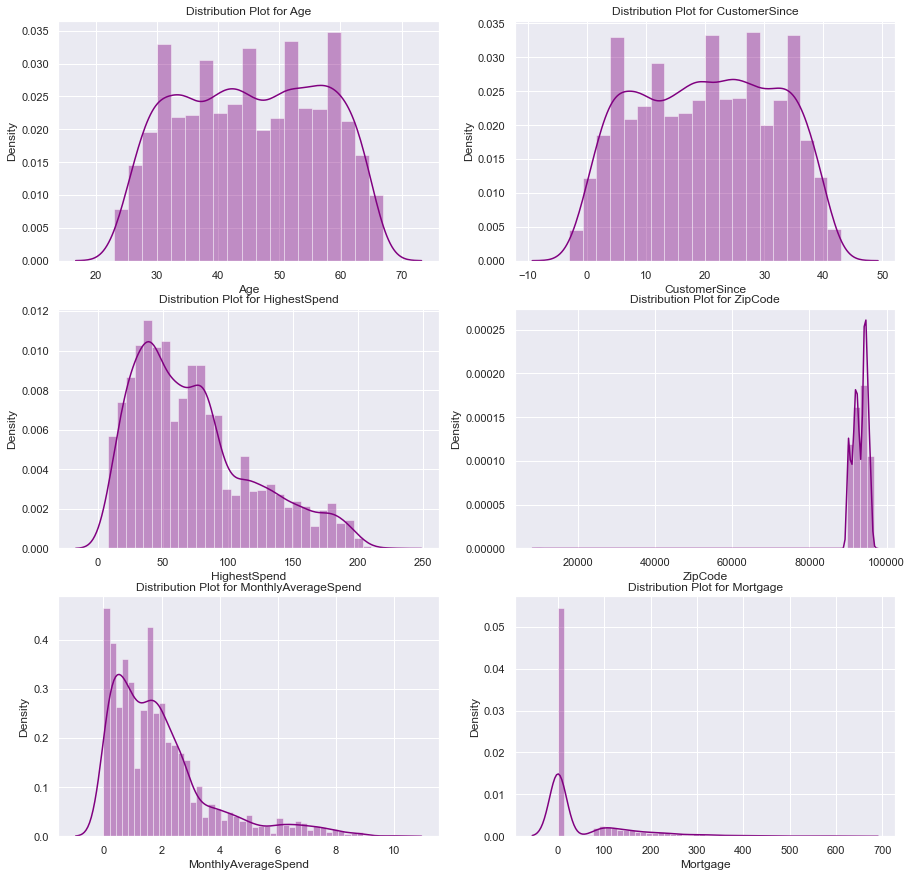

In [75]:
num_var = ['Age','CustomerSince','HighestSpend','ZipCode','MonthlyAverageSpend','Mortgage']
fig2,ax2 = plt.subplots(3,2)
fig2.set_figheight(15)
fig2.set_figwidth(15)
for i,col in  enumerate(num_var):
    sns.distplot(df_bank[col],color='Purple',ax=ax2[i//2,i%2])
    ax2[i//2,i%2].set_title('Distribution Plot for %s'%col)


**Checking for outliers using boxplot and IQR**

In [76]:
#Function to find the outliers. It takes the colum as argument and returns the outlier values.
def check_Outlier2(inp2):
    Q_1_bank = inp2.quantile(0.25)
    Q_3_bank = inp2.quantile(0.75)
    IQR_bank = Q_3_bank - Q_1_bank
    print('\nIQR = ',IQR_bank)
    upper_fence_bank = Q_3_bank+(IQR_bank*1.5)
    lower_fence_bank = Q_1_bank-(IQR_bank*1.5)
    print('Upper Fence = ',upper_fence_bank,'\nLower Fence = ',lower_fence_bank)
    outliers_out2 = inp2[(inp2>upper_fence_bank) | (inp2<lower_fence_bank)]
    return outliers_out2

**Age**

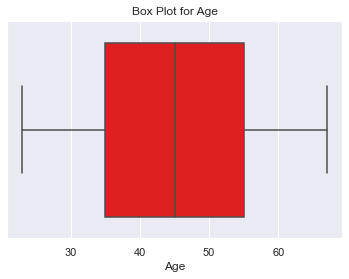

In [77]:
#Boxplot of Age
sns.boxplot(x='Age',data = df_bank,color='Red')
plt.title('Box Plot for Age')
plt.show()

In [78]:
#From above image we can see there are no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.Age)))



IQR =  20.0
Upper Fence =  85.0 
Lower Fence =  5.0

The number of Outliers present =  0


**For Age column there is no outliers.<br>
The data is somewhat normaly distributed.<br>
More data about of people of age group 35-60**

**<br>CustomerSince**

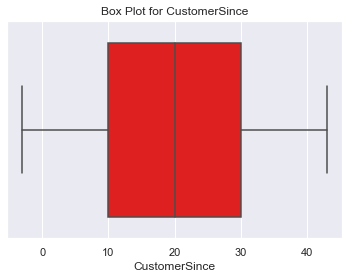

In [79]:
#Boxplot of CustomerSince
sns.boxplot(x='CustomerSince',data = df_bank,color='Red')
plt.title('Box Plot for CustomerSince')
plt.show()

In [80]:
#From above image we can see there are no outliers present but we need to confirm
print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.CustomerSince)))


IQR =  20.0
Upper Fence =  60.0 
Lower Fence =  -20.0

The number of Outliers present =  0


**There are no outliers present.<br>
Most customer are from 10 to 30(units masked)**

<br>**HighestSpend**

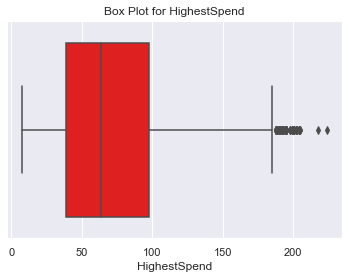

In [81]:
#Boxplot of HighestSpend
sns.boxplot(x='HighestSpend',data = df_bank,color='Red')
plt.title('Box Plot for HighestSpend')
plt.show()

In [82]:
#From above image we can see there are some outliers present but we need to confirm
print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.HighestSpend)))


IQR =  59.0
Upper Fence =  186.5 
Lower Fence =  -49.5

The number of Outliers present =  96


**There are 96 outliers<br>
Right skewness is visible.<br>
Highest amount spend amount between 45 to 100(unit is masked).**

<br>**MonthlyAverageSpend**

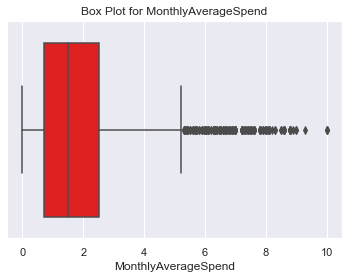

In [83]:
#Boxplot of MonthlyAverageSpend
sns.boxplot(x='MonthlyAverageSpend',data = df_bank,color='Red')
plt.title('Box Plot for MonthlyAverageSpend')
plt.show()

In [84]:
#From above image we can see there are some outliers present but we need to confirm
print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.MonthlyAverageSpend)))


IQR =  1.825
Upper Fence =  5.262499999999999 
Lower Fence =  -2.0374999999999996

The number of Outliers present =  324


**There are 324 outliers.<br>
Monthly Average Spend are high at 1 to 3 units(Unit masked)**

<br>**ZipCode**

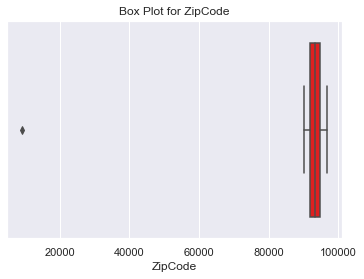

In [85]:
#Boxplot of ZipCode
sns.boxplot(x='ZipCode',data = df_bank,color='Red')
plt.title('Box Plot for ZipCode')
plt.show()

In [86]:
#From above image we can see there are one outlier present but we need to confirm.
print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.ZipCode)))


IQR =  2697.0
Upper Fence =  98653.5 
Lower Fence =  87865.5

The number of Outliers present =  1


**This column is not valuable, will drop during model building.<br>
Does not have any proper distribution.<br>
No repetion for values.**

<br>**Mortgage**

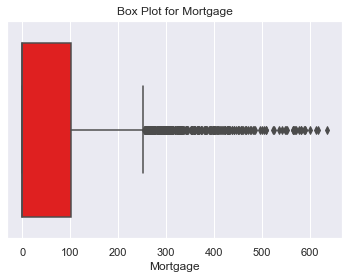

In [87]:
#Boxplot of Mortgage
sns.boxplot(x='Mortgage',data = df_bank,color='Red')
plt.title('Box Plot for Mortgage')
plt.show()

In [88]:
#From above image we can see there are some outlier present but we need to confirm.
print('\nThe number of Outliers present = ',len(check_Outlier2(df_bank.Mortgage)))


IQR =  101.0
Upper Fence =  252.5 
Lower Fence =  -151.5

The number of Outliers present =  291


**This column is not conveying proper meaning.<br>
Most values are zero**

<br><br>**Univariate Analysis of Categorical Data**

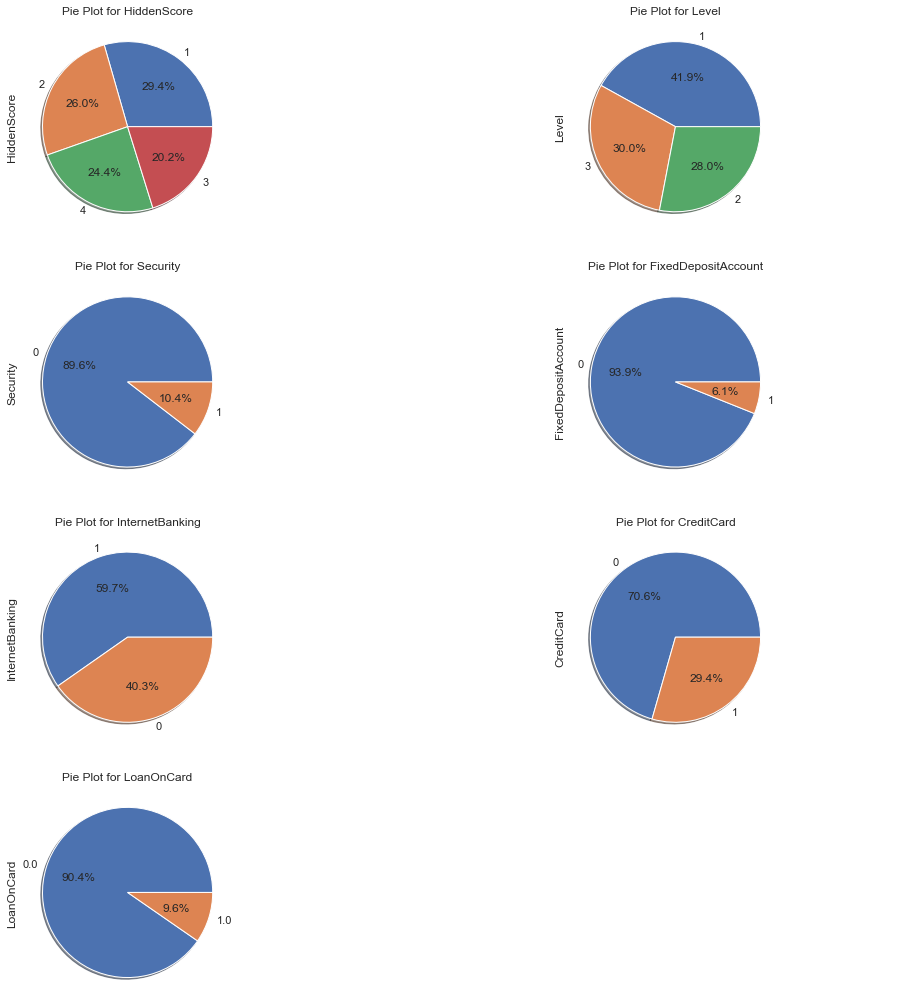

In [89]:

fig3,ax3 = plt.subplots(4,2)
fig3.set_figheight(18)
fig3.set_figwidth(18)
for i,col in  enumerate(cat_col):
    df_bank[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax3[i//2,i%2],shadow=True)
    
    ax3[i//2,i%2].set_title('Pie Plot for %s'%col)
    
ax3[3,1].axis('off')    
plt.show()

**For HiddenScore are almost equally distributed.Group 1 has slightly more.<br>
Level 1 is more compared to rest.Level2 and Level 3 are almost equaly distributed.<br>
Almost 93% of customers do not have fixed deposit.<br>
More people uses Internet Banking(59%)<br>
More than 70% people have credit card which more than average which is good for the bank.<br>
Only 9.6% people is having Loan from card, if this value increased then it will be gain for bank.<br>
Only 10.4% people have security over their account.**

<br><br>**Bi Variate Analysis**

Numerical vs Category

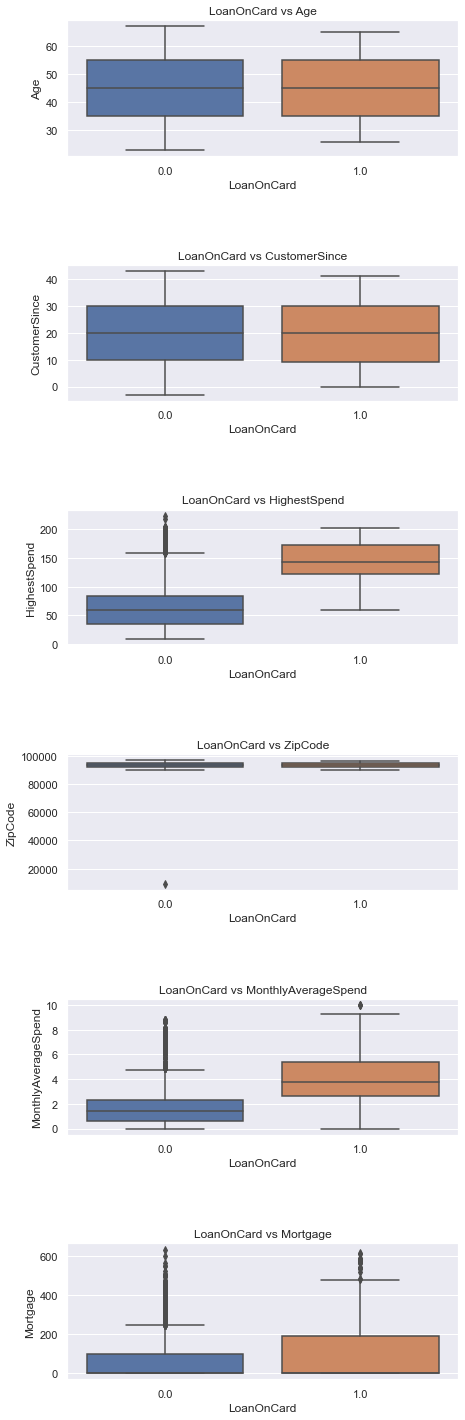

In [90]:
fig4,ax4 = plt.subplots(6)
fig4.set_figheight(25)
fig4.set_figwidth(7)
for i,col in  enumerate(num_var):
    
    sns.boxplot(x='LoanOnCard',y=col,data = df_bank,ax=ax4[i])
    ax4[i].set_title('LoanOnCard vs %s'%col)
    


plt.subplots_adjust(hspace=0.8)
plt.show()

**Both Means are close to each other.For both Loan holders and non holders age group is nearly equaly distributed.<br><br>
Customer Since is also equaly distributed among Loan holders and non holders.Both mean values are also nearly equal<br><br>
Mean of highest spend Loan holders is more than the rest. Customers with loan tend to spend more. There are some customers with no loan also spend high.<br><br>
Zip Code Doesn't Imply any value.<br><br>
Just like HighestSpend monthly average spend is more for loan holders. Also mean for monthly average spend is higher for loan holders.<br><br>
Mean of Mortage is more for loan holders.Both loan holders and non holders have some extreme mortgage values.**

<br>Numerical vs Numerical

MonthlyAverageSpend vs HighestSpend

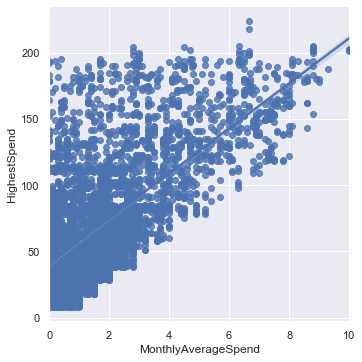

In [91]:
sns.lmplot(x='MonthlyAverageSpend',y='HighestSpend',data=df_bank);


**There is high positive relation between MonthlyAverageSpend and HighestSpend**

MonthlyAverageSpend vs Age 

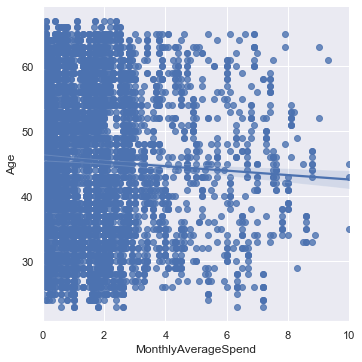

In [92]:
sns.lmplot(x='MonthlyAverageSpend',y='Age',data=df_bank);

**There is no relation betweem MonthlyAverageSpend and Age**

MonthlyAverageSpend vs CustomerSince 

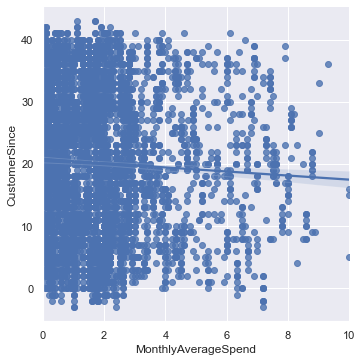

In [93]:
sns.lmplot(x='MonthlyAverageSpend',y='CustomerSince',data=df_bank);

**Here also we cannot observe any relation**

MonthlyAverageSpend vs Mortgage 

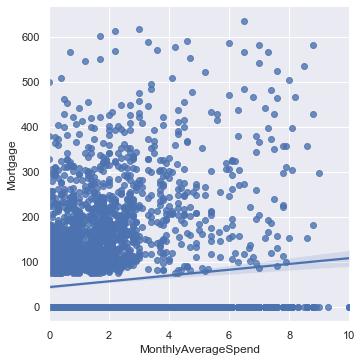

In [94]:
sns.lmplot(x='MonthlyAverageSpend',y='Mortgage',data=df_bank);

**There is a small positive relation between MonthlyAverageSpend and Mortgage**

<br>We can observe the relations using Correaltion

In [95]:
corr2 = df_bank.corr()
corr2
#Display the correaltion values between variables.

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054951,-0.029939,-0.051896,-0.013272
CustomerSince,0.994208,1.000000,-0.046092,-0.029415,-0.049918,-0.011380
HighestSpend,-0.054951,-0.046092,1.000000,-0.016447,0.646109,0.207236
ZipCode,-0.029939,-0.029415,-0.016447,1.000000,-0.004339,0.007214
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.004339,1.000000,0.110275
Mortgage,-0.013272,-0.011380,0.207236,0.007214,0.110275,1.000000


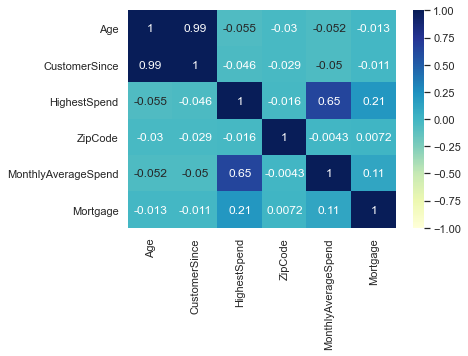

In [96]:
sns.heatmap(corr2,annot=True,cmap='YlGnBu',vmin=-1,vmax=1);
#Heat map of correlation

**CustomerSince and Age has high correlation almost near to 1, which might be good for the model we build.<br>
HighestSpend and MonthlyAverageSpend has good correlation.<br>
There is small correlation between Mortgage and HighestSpend.<br>
The rest of pair of attribute has -ve or no correlation at all.**

<br>Category vs Category 

In [97]:
cat_col[:-1]

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard']

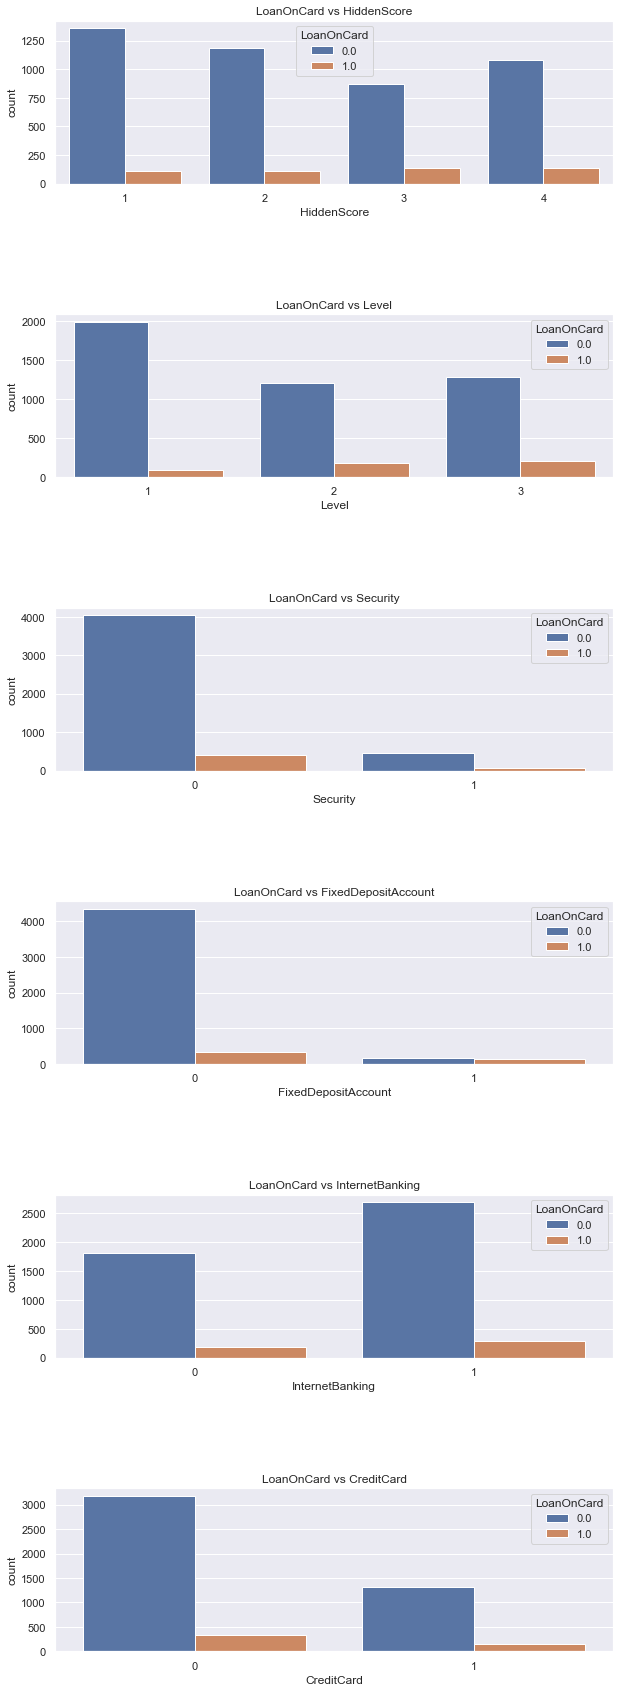

In [98]:
fig5,ax5 = plt.subplots(6)
fig5.set_figheight(30)
fig5.set_figwidth(10)
for i,col in  enumerate(cat_col[:-1]):
    sns.countplot(x=col,hue='LoanOnCard',data=df_bank,ax=ax5[i])
    
    ax5[i].set_title('LoanOnCard vs %s'%col)
    


plt.subplots_adjust(hspace=0.8)
plt.show()

**Non-Loan holders have higher Hidden score<br>
Level 1 have higher Non-Loan holders. Level2 and Level3 have equal amount of Loan holders.<br>
Non-Loan holders have security than Loan Holders and the Loan holders having no security is almost same.
There is almost equal amount of FixedDepositAccount for Loan holders and Non Loan holders.<br>
Non Loan holders are having more InternetBanking using customer.<br>
Non Loan holders does not have credit card enabled.**


<br>**Multivariate Analysis**

Level vs MonthlyAverageSpend vs LoanOnCard

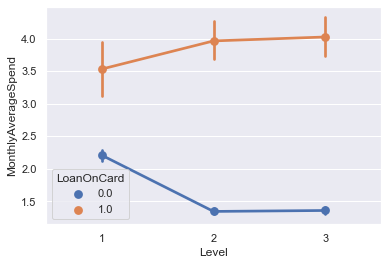

In [99]:
sns.pointplot(x='Level',y='MonthlyAverageSpend',hue='LoanOnCard',data=df_bank);

Loan Holders spend more on Monthly average.Level 1 have higher Non Loan Holders.

<br><br>CreditCard vs MonthlyAverageSpend vs LoanOnCard

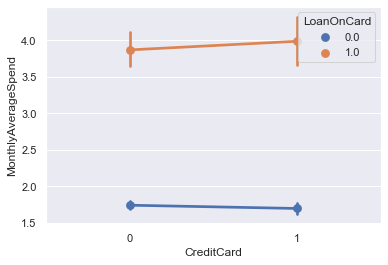

In [100]:
sns.pointplot(x='CreditCard',y='MonthlyAverageSpend',hue='LoanOnCard',data=df_bank);

Credit Card Holders spend more than Non card holders.

<br><br>FixedDepositAccount vs MonthlyAverageSpend vs LoanOnCard

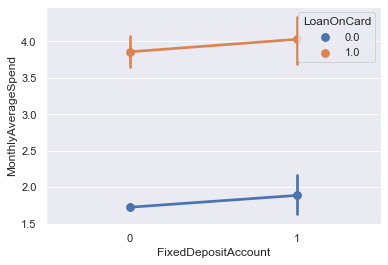

In [101]:
sns.pointplot(x='FixedDepositAccount',y='MonthlyAverageSpend',hue='LoanOnCard',data=df_bank);

FixedDepositAccount holders spend more

<br><br>InternetBanking vs MonthlyAverageSpend vs LoanOnCard

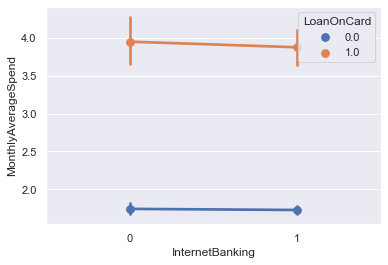

In [102]:
sns.pointplot(x='InternetBanking',y='MonthlyAverageSpend',hue='LoanOnCard',data=df_bank);

Customers having InternetBanking and those who do not have almost equal same amount of monthly spend.

### 4.Data pre-processing:

For building an ML model we should take extra care on choosing what all attributes to choose. It is better to select those attribute that has significant amount of relation to the target variable. Other attributes must be removed.

From category vs category and multivariate analysis we can observe that attributes such as Security,CreditCard and InternetBanking does not influence our target variable LoanOnCard.
So dropping this columns before building models.

In [103]:
df_bank.drop(['Security','InternetBanking','CreditCard'],axis=1,inplace=True)
df_bank.head() #here we droped the column and printed.

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0.0
12,48,23,114,93106,2,3.8,3,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0.0


Similarly we can observe from numerical vs categorical analysis that ZipCode,CustomerSince,Age does not influence our target variable LoanOnCard. So dropping before building model.

In [104]:
df_bank.drop(['ZipCode','CustomerSince','Age'],axis=1,inplace=True)
df_bank.head() #here we droped the column and printed.

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
9,180,1,8.9,3,0,0,1.0
10,105,4,2.4,3,0,0,0.0
11,45,3,0.1,2,0,0,0.0
12,114,2,3.8,3,0,0,0.0
13,40,4,2.5,2,0,0,0.0


In [105]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HighestSpend         4980 non-null   int64   
 1   HiddenScore          4980 non-null   category
 2   MonthlyAverageSpend  4980 non-null   float64 
 3   Level                4980 non-null   category
 4   Mortgage             4980 non-null   int64   
 5   FixedDepositAccount  4980 non-null   category
 6   LoanOnCard           4980 non-null   category
dtypes: category(4), float64(1), int64(2)
memory usage: 335.6 KB


<br>**Dealing Outliers**<br>
After removing unwanted columns,from multiple analysis we have observed number of outliers present in each variable. These outliers can hinder our prediction. We can deal with these outliers either by removing them or replacing them with respective mean,median etc. But removing outliers sometimes can lead to loosing valuable information, and considering this a small dataset it is better to impute the outliers.

**Printing outliers in each independent variables and imputing them with their respective mean values.**

In [106]:
col_val = ['HighestSpend','MonthlyAverageSpend','Mortgage']

for val in col_val:
    print('\n',val,'\n')
    out_r2 = check_Outlier2(df_bank[val])
    
    print('The number of Outliers present in %s before imputing = %d'%(val,len(out_r2)))
    Q25,Q75 = df_bank[val].quantile(0.25),df_bank[val].quantile(0.75)
    IQR = Q75-Q25
    T2 = IQR*1.5 
    l_value,u_value = Q25-T2,Q75+T2
    
    out_df2 = df_bank.loc[(df_bank[val] >=l_value) & (df_bank[val] <= u_value)]
    bank_mean = int(out_df2[val].mean())
    print('Mean of %s = %f'%(val,bank_mean))
    df_bank[val] = np.where(df_bank[val]>u_value,bank_mean,df_bank[val])
    df_bank[val] = np.where(df_bank[val]<l_value,bank_mean,df_bank[val])
    out_r2 = df_bank.loc[(df_bank[val] <l_value) & (df_bank[val] > u_value)]
    print('The number of Outliers present in %s after imputing = %d'%(val,len(out_r2)))


 HighestSpend 


IQR =  59.0
Upper Fence =  186.5 
Lower Fence =  -49.5
The number of Outliers present in HighestSpend before imputing = 96
Mean of HighestSpend = 71.000000
The number of Outliers present in HighestSpend after imputing = 0

 MonthlyAverageSpend 


IQR =  1.825
Upper Fence =  5.262499999999999 
Lower Fence =  -2.0374999999999996
The number of Outliers present in MonthlyAverageSpend before imputing = 324
Mean of MonthlyAverageSpend = 1.000000
The number of Outliers present in MonthlyAverageSpend after imputing = 0

 Mortgage 


IQR =  101.0
Upper Fence =  252.5 
Lower Fence =  -151.5
The number of Outliers present in Mortgage before imputing = 291
Mean of Mortgage = 38.000000
The number of Outliers present in Mortgage after imputing = 0


<br>Outliers have been removed

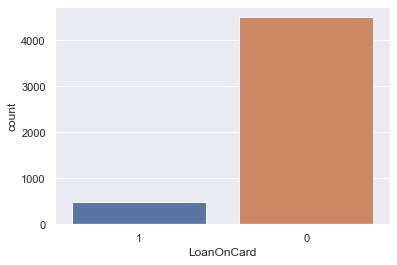

In [107]:
#Since class is our target variable, we need to check for  target imbalancing. 
#Imbalancing refers where the number of observations per class is not 
#equally distributed which may hinder our classification
#We can check for this distribution using countplot
sns.countplot('LoanOnCard',data=df_bank,order=[1,0]);

There is large amount of imbalance. Category 0 has the highest. This will lead to predicting towards the category which have more data.
This can be removed using various methods.

**Segregating Predictors and Target variables**

In [108]:
X=df_bank.drop(columns='LoanOnCard')
y=df_bank['LoanOnCard'] 
X.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
9,180,1,1.0,3,0,0
10,105,4,2.4,3,0,0
11,45,3,0.1,2,0,0
12,114,2,3.8,3,0,0
13,40,4,2.5,2,0,0


Normaly it is required to scale the data inorder for our model to work correctly.But since our data is masked and almost in equal range we are not scaling.

**Now since the data is pre processed we can split the data to tain and test.**

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

### 5.Model training, testing and tuning:

**Logistic Regression Model**

In [110]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_predicted = logit.predict(X_test)
print('Accuracy of Training data: ',logit.score(X_train,y_train))
print('Accuracy of Test data: ',logit.score(X_test,y_test))

Accuracy of Training data:  0.9506597819850832
Accuracy of Test data:  0.9424364123159303


Test data have 94% accuracy which is closer to training set accuracy of 95%,which is good measure but we have to take account that the data is imbalanced.

We can visualise using Confusion matrix

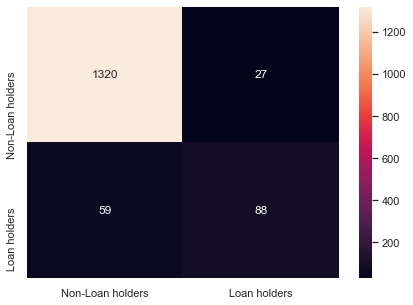

In [111]:
cm2 = confusion_matrix(y_test,logit_predicted,labels=[0,1])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["Non-Loan holders","Loan holders"]],columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm2, annot=True,fmt ='g')
plt.show()

From above confusion matrix we can see that Non Loan holders are correctly predicted mostly, this might be due to imbalance. When comparing both classification gets low error before sampling.

<br>**Classification Report:**

In [112]:
print("\t\tClassification Report:\n",classification_report(y_test,logit_predicted))

		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1347
         1.0       0.77      0.60      0.67       147

    accuracy                           0.94      1494
   macro avg       0.86      0.79      0.82      1494
weighted avg       0.94      0.94      0.94      1494



As we said above the model is predicting category 0 with more precision while category 1 is poorly predicted.<br>
Category 0 have higher precision value 0.96 which means what fraction are predicted correctly out of all predicted same class.<br>
Category 1 have lower recall value 0.60 which means out of all actual  class how much fraction were identified correctly.<br>

<br>**Naive Bayes Model**

In [113]:
g_model = GaussianNB()
g_model.fit(X_train,y_train.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy of Training data: ',g_model.score(X_train,y_train))
print('Accuracy of Test data: ',g_model.score(X_test,y_test))

Accuracy of Training data:  0.9104991394148021
Accuracy of Test data:  0.9022757697456493


**Accuracy of test data is close to accuracy of training data.**

We can visualise using Confusion matrix

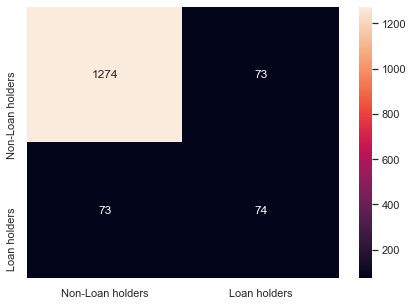

In [114]:
cm3 = confusion_matrix(y_test,g_pred,labels=[0,1])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["Non-Loan holders","Loan holders"]],columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm3, annot=True,fmt ='g')
plt.show()

<br>**Classification Report:**

In [115]:
print("\t\tClassification Report:\n",classification_report(y_test,g_pred))

		Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1347
         1.0       0.50      0.50      0.50       147

    accuracy                           0.90      1494
   macro avg       0.72      0.72      0.72      1494
weighted avg       0.90      0.90      0.90      1494



Recall value and Precision value for class 1 is equal.<br>
Recall value for class 1 is less in naive bayes model compared to logistic regression.

### 6.Conclusion and improvisation.

**From classification report we can say Logistic Regression performs well in both training and testing data.<br>
I would suggest to collect data more balanced to avoid sampling of data.<br>
Some data are missing, could have improved in collecting them.<br>
The data contained more non usefull data, almost 6 attributes were removed.Could have avoided and added more relevant ones.**